# Goal 
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

# Attribute information  ::  Input variables: 
 
Bank client data: 
1. age: Continuous feature  
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.) 
3. marital: marital status (married, single, divorced) 
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?  
6. housing: has housing loan? 
7. loan: has personal loan? 
8. balance in account 
 
Related to previous contact:

9. contact: contact communication type 
10. month: last contact month of year 
11. day: last contact day of the month 
12. duration: last contact duration, in seconds* 
 
Other attributes: 
 
13.  campaign: number of contacts performed during this campaign and for this client 
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days) 
15. previous: number of contacts performed before this campaign and for this client 
16. poutcome: outcome of the previous marketing campaign 
 
Output variable (desired target):

17. Target: Tell us has the client subscribed a term deposit. (Yes, No) 

In [71]:
# Import all necessary modules and load the data

In [72]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
#import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

#from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [73]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Check for shape of data and data types!

In [74]:
df.shape

(45211, 17)

In [75]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

# Check for null values or missing values

In [76]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Observed no missing values in given set.

# Print the descriptive statistics of each & every column using describe() function

In [78]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,"45,211.00",40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"45,211.00","1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
day,"45,211.00",15.81,8.32,1.00,8.00,16.00,21.00,31.00
duration,"45,211.00",258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,"45,211.00",2.76,3.10,1.00,1.00,2.00,3.00,63.00
pdays,"45,211.00",40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00
previous,"45,211.00",0.58,2.30,0.00,0.00,0.00,0.00,275.00


Minimum Balance is negative, But it seems to be valid scenario. No need to replace the negative value.
pdays is negtive which tells us person is not contacted or contact period is beyond 900 days. So no need to replace the values it also seems valid.

# Convert the columns with value yes or no to Binary values.

In [79]:
def binaryConversion(value):
    if (value == 'no'):
        return 0
    else:
        return 1


In [80]:
df['default_binary']  = df.apply(lambda row: binaryConversion(row['default']),axis=1)
df['housing_binary']  = df.apply(lambda row: binaryConversion(row['housing']),axis=1)
df['loan_binary'] = df.apply(lambda row: binaryConversion(row['loan']),axis=1)
df['Target_binary'] = df.apply(lambda row: binaryConversion(row['Target']), axis=1)

In [81]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,Target,default_binary,housing_binary,loan_binary,Target_binary
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,0,0,0,0


# Range of Values observed

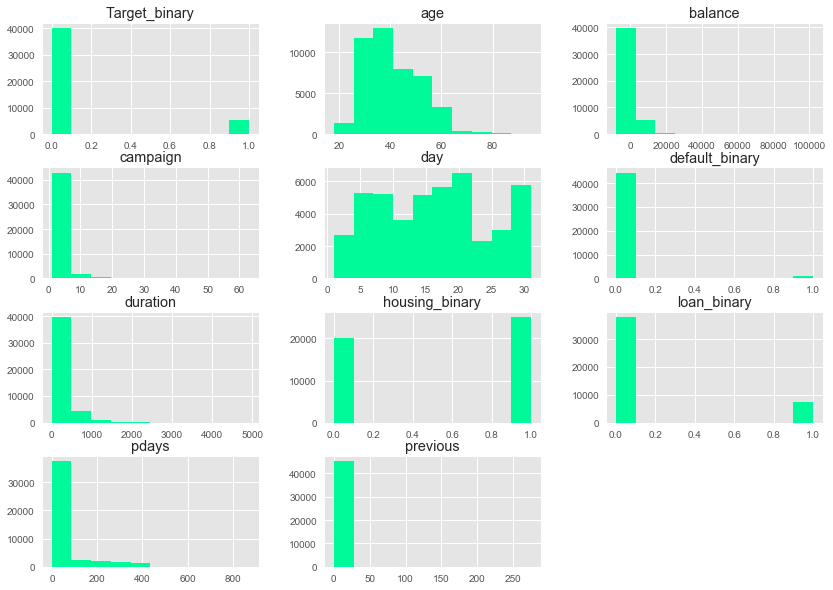

In [82]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(14,10), color="#00FA9A")
plt.show()

In [83]:
TermDepositDf = df.copy()

for i in TermDepositDf.columns:
    x = TermDepositDf[i].value_counts()
    print("Column name is:",i,"and it value is:",x)
    print()

Column name is: age and it value is: 32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

Column name is: job and it value is: blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Column name is: marital and it value is: married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Column name is: education and it value is: secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Column name is: default and it value is: no     44396
yes      815
Name: default, dtype: int64

Column name is: balance and it value is: 0        3514
1         195
2         156
4         139
3         13

In [84]:
#Dropping the original columns since we have binary columns for same
df.drop(['housing', 'loan', 'default'], axis=1, inplace=True)
df.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,default_binary,housing_binary,loan_binary,Target_binary
0,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,no,0,1,0,0
1,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,no,0,1,0,0
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown,no,0,1,1,0
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown,no,0,1,0,0
4,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown,no,0,0,0,0


In [85]:
df["Target"].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [86]:
df["Target_binary"].value_counts()

0    39922
1     5289
Name: Target_binary, dtype: int64

* Age : Mean Age is 41 and ranging between 18 to 95
* Balance : Mean is 1363 and ranging to high
* Duration column is highly corelated.
* Housing, default, loan, including target are classification with values 0 or 1
* Number of "NO" is higher than "Yes" with respective target variable.

# Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc.

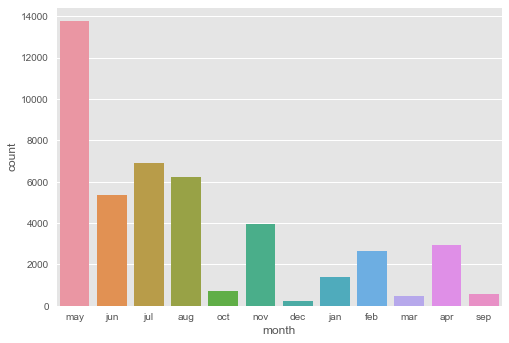

In [87]:
# To Check month wise acceptance or rejection of term deposit
sns.countplot(df['month'])

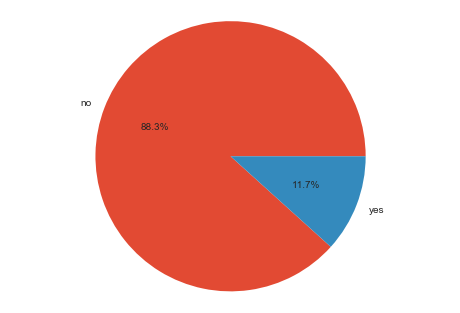

In [88]:
df1 =pd.DataFrame(df["Target"].value_counts()).reset_index()
df1.columns =["Labels","Target"]
plt.pie(df1["Target"],labels=df1["Labels"],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

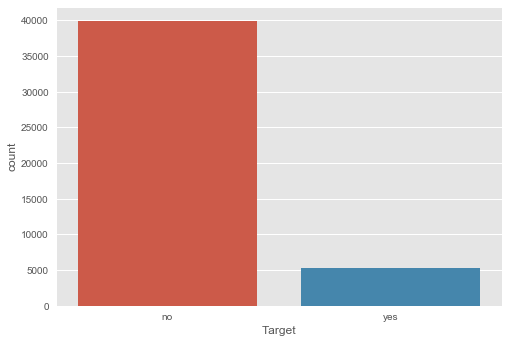

In [89]:
sns.countplot(df['Target'])

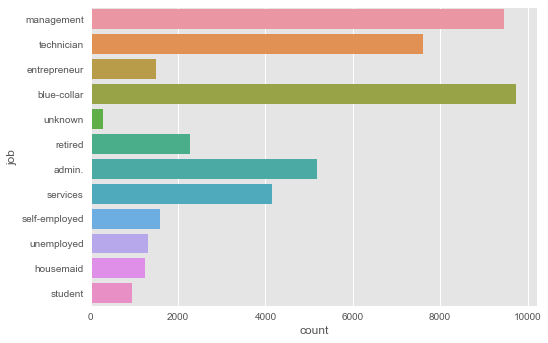

In [90]:
sns.countplot(y ='job', data = df) 

# Use correlation method to observe the relationship between different variables and state your insights.

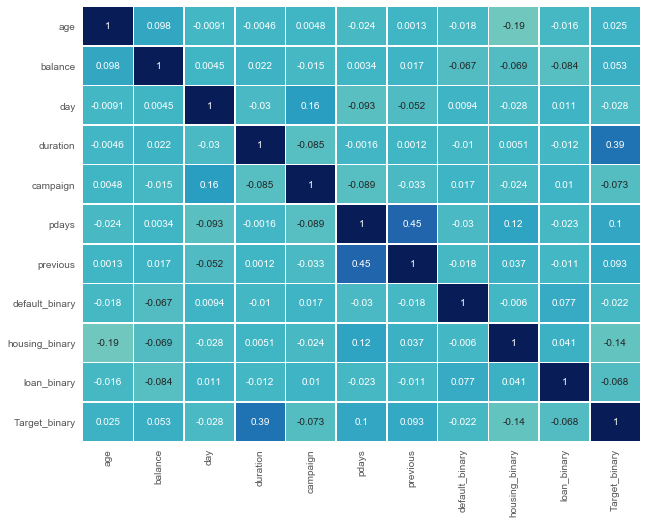

In [91]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

# Bi-variate analysis between the predictor variables and target column

In [92]:
#Analyse between months and target variable to undestand % of acceptance and rejection
print(df['month'].value_counts())

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


In [93]:
depositPerMonth = pd.crosstab(df['month'], df['Target']).apply(lambda x: x/x.sum() * 100)
depositPerMonth

Target,no,yes
month,,
apr,5.90,10.91
aug,13.92,13.01
dec,0.29,1.89
feb,5.53,8.34
jan,3.16,2.68
jul,15.70,11.85
jun,12.01,10.32
mar,0.57,4.69
may,32.17,17.49


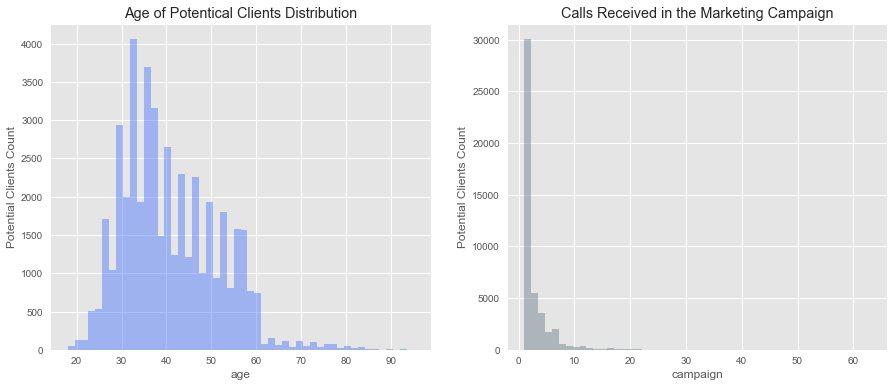

In [94]:
import seaborn as sns

f, axes = plt.subplots(ncols=2, figsize=(15, 6))
# Age
sns.distplot(df['age'], kde=False, color="#3366ff", ax=axes[0]).set_title('Age of Potentical Clients Distribution')
axes[0].set_ylabel('Potential Clients Count')

# Campaigns
sns.distplot(df['campaign'], kde=False, color="#546E7A", ax=axes[1]).set_title('Calls Received in the Marketing Campaign')
axes[1].set_ylabel('Potential Clients Count')

plt.show()

* Month of may has highest acceptance and rejections.
* Age and job are corelate

* Numerica Variables : age, balance,day,campaign,pdays,previous,duration.
* Categorical Variables : job,martial,education,contact,month,poutcome [ one hot enconding to be performed]
* categorical variables with binary value conversion : default,housing,loan and target

In [95]:
lst = [df]

# Create a column with the numeric values of the months.
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12
    
for column in lst:
    column.loc[column["job"] == "blue-collar", "job_int"] = 1
    column.loc[column["job"] == "management", "job_int"] = 2
    column.loc[column["job"] == "technician", "job_int"] = 3
    column.loc[column["job"] == "admin.", "job_int"] = 4
    column.loc[column["job"] == "services", "job_int"] = 5
    column.loc[column["job"] == "retired", "job_int"] = 6
    column.loc[column["job"] == "self-employed", "job_int"] = 7
    column.loc[column["job"] == "entrepreneur", "job_int"] = 8
    column.loc[column["job"] == "unemployed", "job_int"] = 9
    column.loc[column["job"] == "housemaid", "job_int"] = 10
    column.loc[column["job"] == "student", "job_int"] = 11
    column.loc[column["job"] == "unknown", "job_int"] = 12

for column in lst:
    column.loc[column["education"] == "tertiary", "education_int"] =1
    column.loc[column["education"] == "secondary", "education_int"] =2
    column.loc[column["education"] == "primary", "education_int"] =3
    column.loc[column["education"] == "unknown", "education_int"] =4

for column in lst:
    column.loc[column["poutcome"] == "other", "poutcome_int"] =1
    column.loc[column["poutcome"] == "success", "poutcome_int"] =2
    column.loc[column["poutcome"] == "failure", "poutcome_int"] =3
    column.loc[column["poutcome"] == "unknown", "poutcome_int"] =4

for column in lst:
    column.loc[column["marital"] == "single", "marital_int"] =1
    column.loc[column["marital"] == "married", "marital_int"] =2
    column.loc[column["marital"] == "divorced", "marital_int"] =3
    
for column in lst:
    column.loc[column["contact"] == "cellular", "contact_int"] =1
    column.loc[column["contact"] == "unknown", "contact_int"] =2
    column.loc[column["contact"] == "telephone", "contact_int"] =3
    
# Change datatype from int32 to int64
df["month_int"] = df["month_int"].astype(np.int64)
df["job_int"] = df["job_int"].astype(np.int64)
df["education_int"] = df["education_int"].astype(np.int64)
df["poutcome_int"] = df["poutcome_int"].astype(np.int64)
df["marital_int"] = df["marital_int"].astype(np.int64)
df["contact_int"] = df["contact_int"].astype(np.int64)
df.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,...,default_binary,housing_binary,loan_binary,Target_binary,month_int,job_int,education_int,poutcome_int,marital_int,contact_int
0,58,management,married,tertiary,2143,unknown,5,may,261,1,...,0,1,0,0,5,2,1,4,2,2
1,44,technician,single,secondary,29,unknown,5,may,151,1,...,0,1,0,0,5,3,2,4,1,2
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,...,0,1,1,0,5,8,2,4,2,2
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,...,0,1,0,0,5,1,4,4,2,2
4,33,unknown,single,unknown,1,unknown,5,may,198,1,...,0,0,0,0,5,12,4,4,1,2


In [96]:
#Dropping the original columns since we have binary columns for same
TermDepositDF = df.copy()
TermDepositDF.drop(['job', 'month','education','poutcome','marital','contact','Target'], axis=1, inplace=True)
TermDepositDF.head()

,age,balance,day,duration,campaign,pdays,previous,default_binary,housing_binary,loan_binary,Target_binary,month_int,job_int,education_int,poutcome_int,marital_int,contact_int
0,58,2143,5,261,1,-1,0,0,1,0,0,5,2,1,4,2,2
1,44,29,5,151,1,-1,0,0,1,0,0,5,3,2,4,1,2
2,33,2,5,76,1,-1,0,0,1,1,0,5,8,2,4,2,2
3,47,1506,5,92,1,-1,0,0,1,0,0,5,1,4,4,2,2
4,33,1,5,198,1,-1,0,0,0,0,0,5,12,4,4,1,2


In [97]:
TermDepositDF.shape

(45211, 17)

# Split the data into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.

In [98]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split,cross_val_score
feature = TermDepositDF.drop(["Target_binary"],axis=1)
target = TermDepositDF["Target_binary"]

X_train, X_test, y_train, y_test = train_test_split(feature,target,
                                                    test_size=0.30,
                                                   random_state=22)

# Logistic Regression

In [99]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [100]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.889689386039751

Testing accuracy 0.8886021822471247

Confusion Matrix


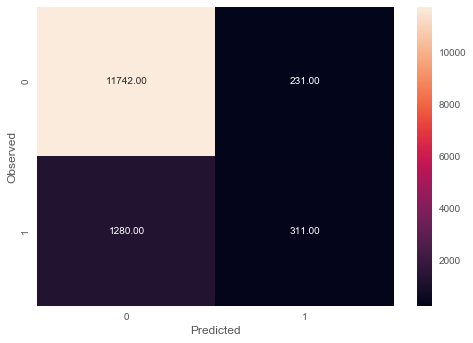

None

Recall: 0.19547454431175362

Precision: 0.5738007380073801

F1 Score: 0.2916080637599625

Roc Auc Score: 0.5880905670694323


In [101]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

# Decision Trees Using Entropy

In [102]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  

model_entropy = DecisionTreeClassifier(criterion='entropy')

In [103]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [104]:
#### Print the accuracy of the model & print the confusion matrix
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.88


#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting. 

#### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [105]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [106]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.90
Test: 0.90


In [107]:
y_train.value_counts()

0    27949
1     3698
Name: Target_binary, dtype: int64

In [108]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

## Decision tree performance

In [109]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11689,284
1,1078,513


In [110]:
!pip install yellowbrick

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


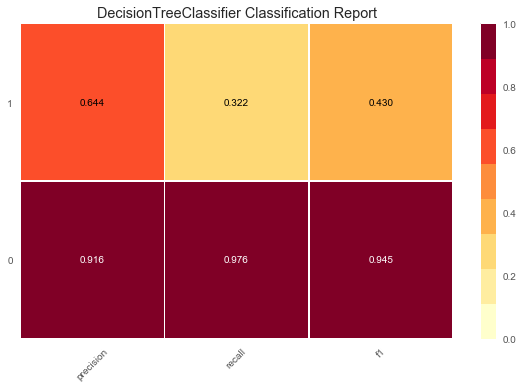

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


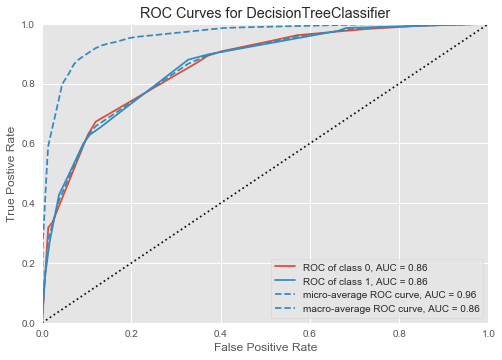

In [111]:
# Visualize model performance with yellowbrick library
from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

#### Performance metrics

- __Precision__: Fraction of actuals per label that were correctly classified by the model
- __Recall__: Fraction of predictions that were correctly classified by the model
- __F1-score__: Weighted harmonic mean of the precision and recall. F1-score: 2 * (precision * recall) / (precision + recall)
- __Support__: Number of occurrences of each class in y_test
- __Accuracy__: Fraction of all observations that were correctly classified by the model
- __Macro avg__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
- __Micro/weighted avg__: Calculate metrics globally by counting the total true positives, false negatives and false positives
- __AUC Score__: Given a random observation from the dataset that belongs to a class, and a random observation that doesn't belong to a class, the AUC is the perecentage of time that our model will classify which is which correctly

In [112]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90


### Apply the Random forest model and print the accuracy of Random forest Model

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,random_state=12)
rfcl = rfcl.fit(X_train, y_train)

In [114]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [115]:
pred_RF_train=rfcl.predict(X_train)
acc_RF_train = accuracy_score(y_train, pred_RF_train)
acc_RF_train

0.9996208171390654

In [116]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Random Forest,0.91


C:\Users\chait\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


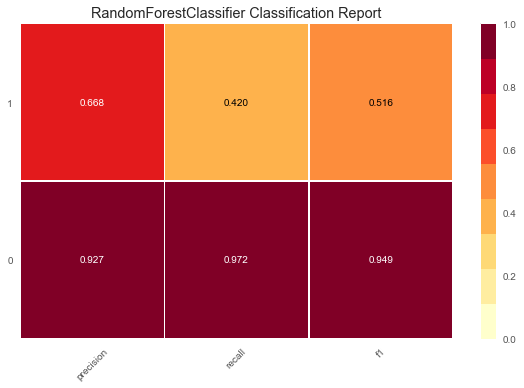

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


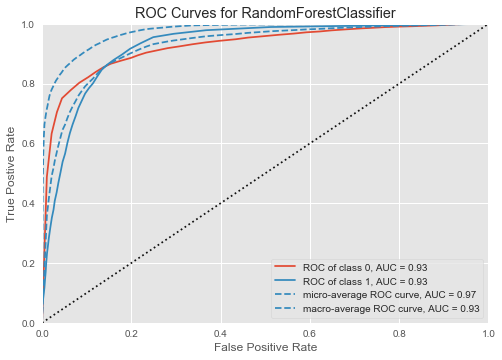

In [117]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [118]:
#Reduce Overfitting 

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,random_state=12,max_depth=4,criterion="entropy")
rfcl = rfcl.fit(X_train, y_train)

pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
tempResultsDf = pd.DataFrame({'Method':['Random Forest - Entropy'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Random Forest,0.91
0,Random Forest - Entropy,0.89


### Apply Bagging Classifier Algorithm and print the accuracy.

In [119]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [120]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [121]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Random Forest,0.91
0,Random Forest - Entropy,0.89
0,Bagging,0.90


C:\Users\chait\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


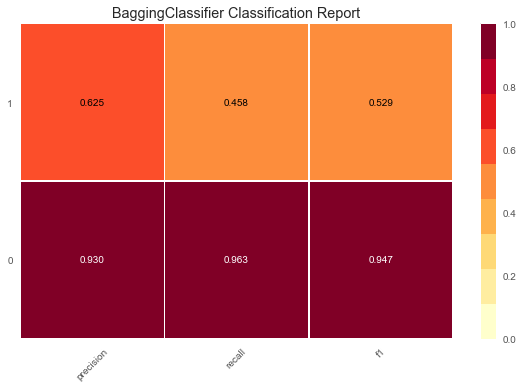

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


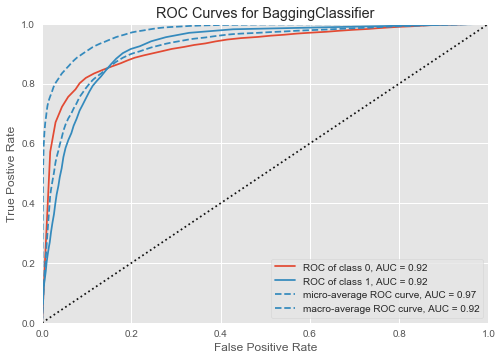

In [122]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

# Apply ADABOOST Algorithm for the same data and print the accuracy

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


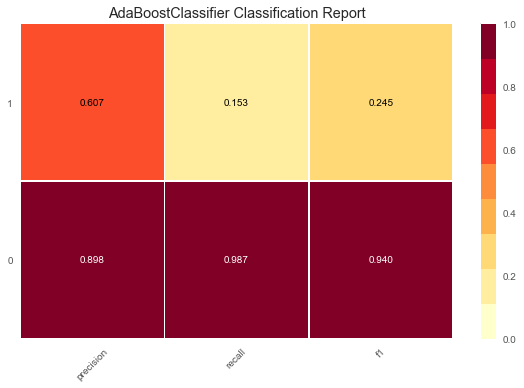

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


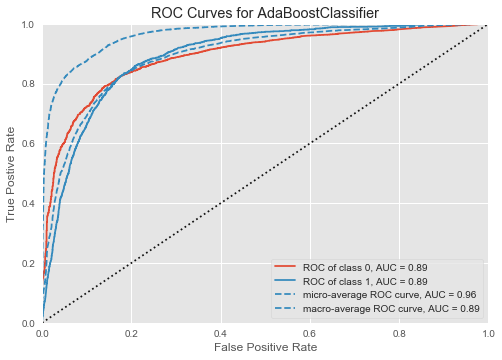

In [123]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)


tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [124]:
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Random Forest,0.91
0,Random Forest - Entropy,0.89
0,Bagging,0.90
0,Adaboost,0.89


### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, max_depth=4,random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [126]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [127]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regularised '], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.90
0,Random Forest,0.91
0,Random Forest - Entropy,0.89
0,Bagging,0.90
0,Adaboost,0.89
0,Gradient Boost Regularised,0.90


C:\Users\chait\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


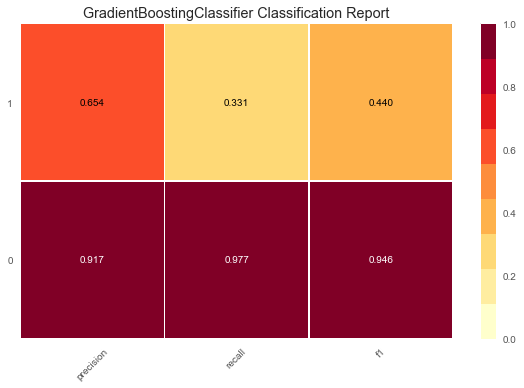

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


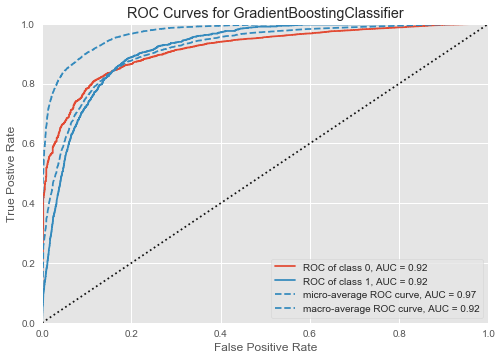

In [128]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

# For this dataset, Random forest,bagging models and gradient give the best results on test predictions

In [129]:
# Creating a function for visualizing classifier results
def visClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


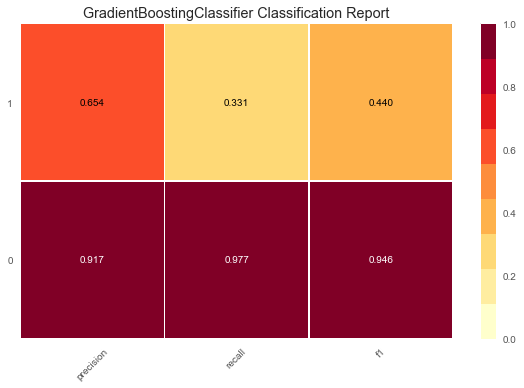

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


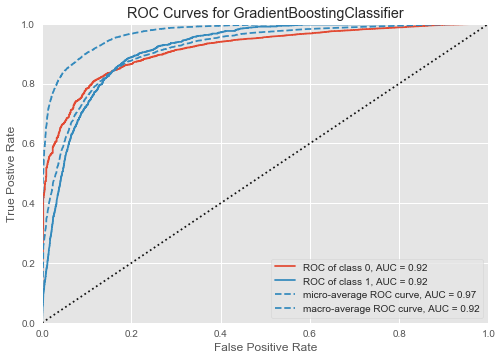

In [130]:
visClassifierResults(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

Conclusion : Best Algorithm as per analysis on dataset shows
        a] Random Forest
        b] Bagging Model
        c] Gradient Boost